In [1]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression

/Users/jasonmaytin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
geographicinfo = pd.read_csv("/Users/jasonmaytin/Desktop/EValuateNY-ZIP-File/resources.csv")
geographicinfo = geographicinfo.set_index("ZIP Code")
census = pd.read_csv("/Users/jasonmaytin/Desktop/EValuateNY-ZIP-File/census_bureau.csv")
registrations = pd.read_csv("/Users/jasonmaytin/Desktop/EValuateNY-ZIP-File/ny_ev_registrations.csv")
grouped = registrations.groupby("ZIP Code").count()["DMV ID"]

In [3]:
vehicleshare = pd.read_csv("/Users/jasonmaytin/Desktop/EValuateNY-ZIP-File/Vehicle_Share.csv")
originalregs = pd.read_csv("/Users/jasonmaytin/Desktop/EValuateNY-ZIP-File/NY Original Registrations.csv")

In [4]:
pd.unique(originalregs["MULTIPURPOSE PASSENGER VEHICLE (MPV)"])

array(['MULTIPURPOSE PASSENGER VEHICLE (MPV)', 'PASSENGER CAR',
       'INCOMPLETE VEHICLE', 'BUS', 'TRUCK ', nan, 'TRAILER',
       'LOW SPEED VEHICLE (LSV)', 'MOTORCYCLE'], dtype=object)

In [4]:
want1 = census.groupby("ZIP Code").sum()
want2 = want1.merge(grouped,left_index=True,right_index=True)
want3 = want2.merge(geographicinfo,left_index=True,right_index=True)

<ipython-input-4-871c1277b6de>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  want1 = census.groupby("ZIP Code").sum()


In [5]:
value = want2["DMV ID"]/want2["Population"]
small = want2[value<np.quantile(value,0.8)]
big = want2[value>np.quantile(value,0.8)]

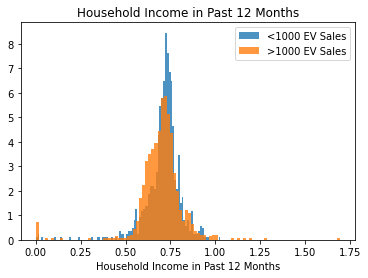

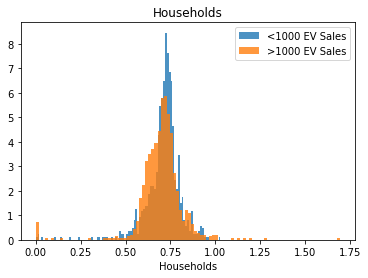

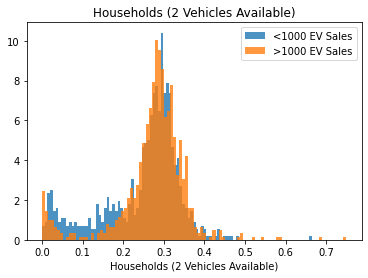

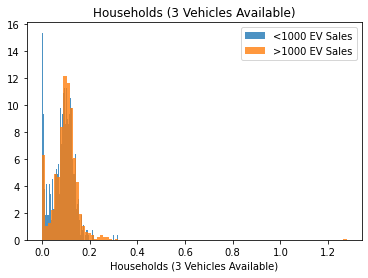

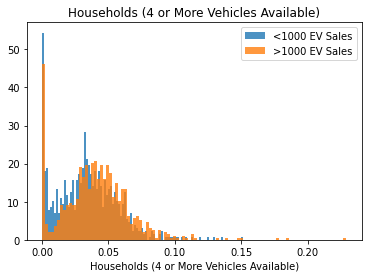

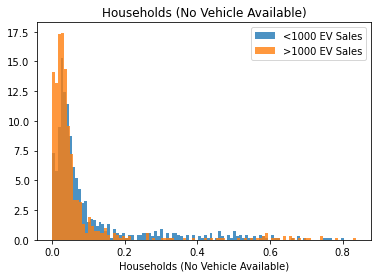

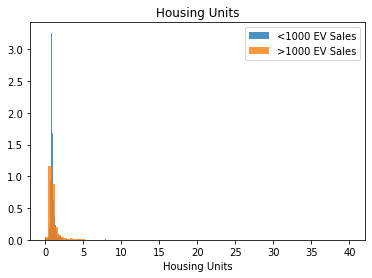

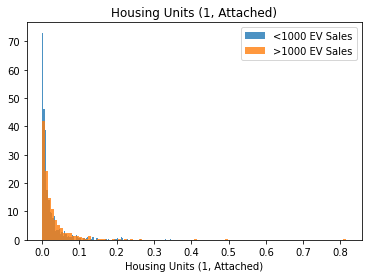

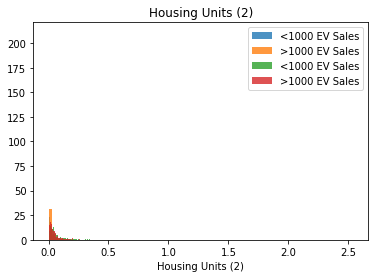

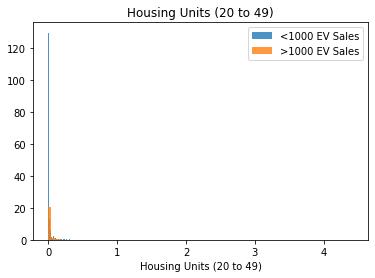

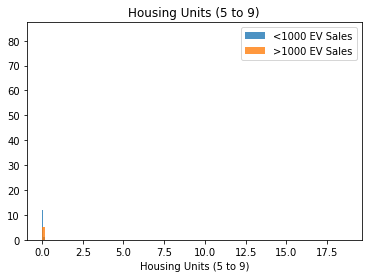

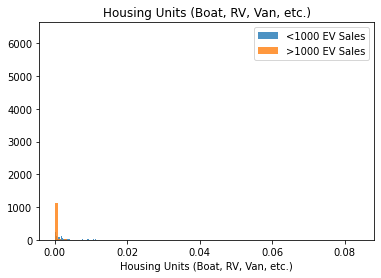

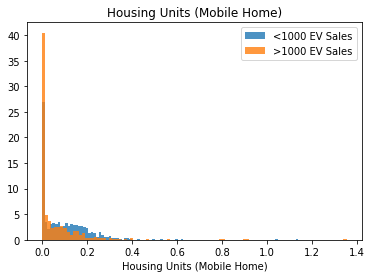

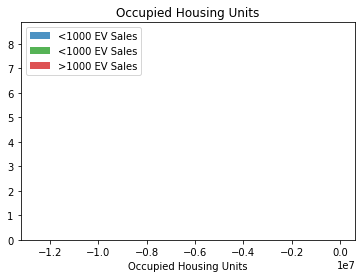

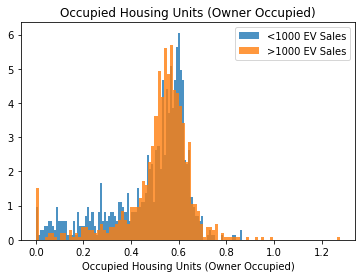

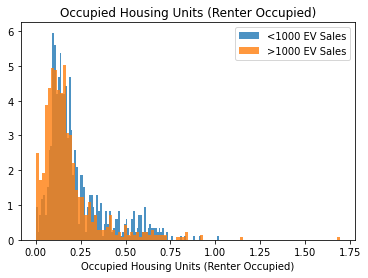

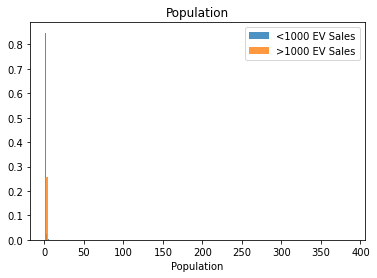

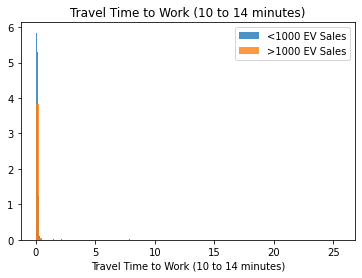

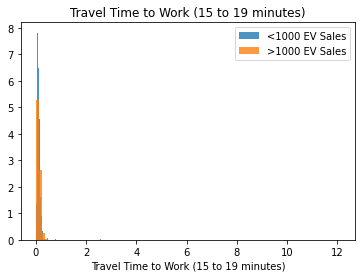

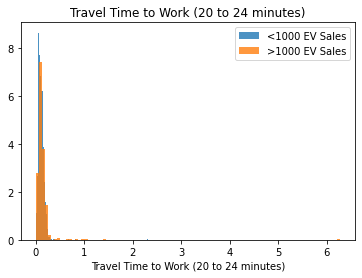

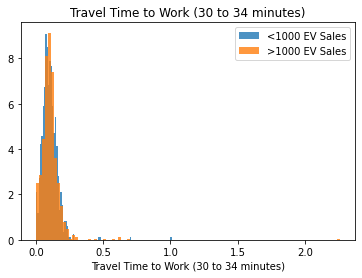

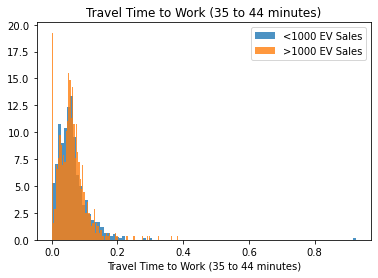

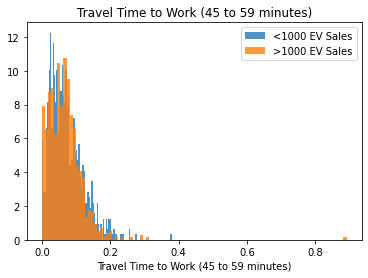

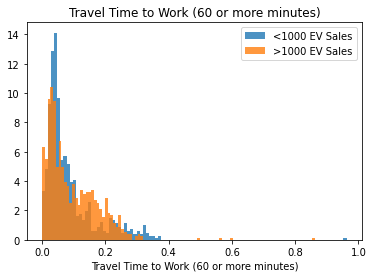

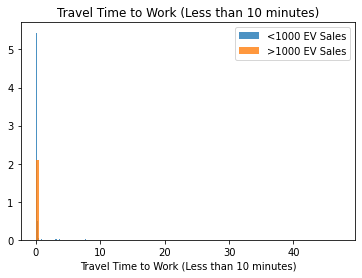

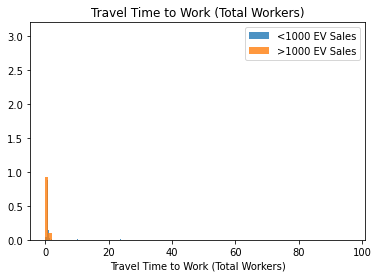

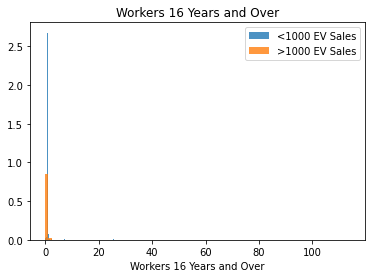

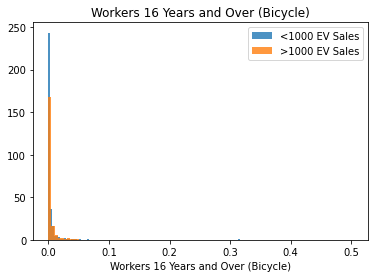

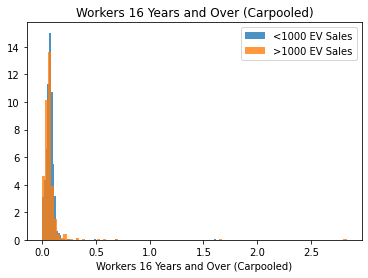

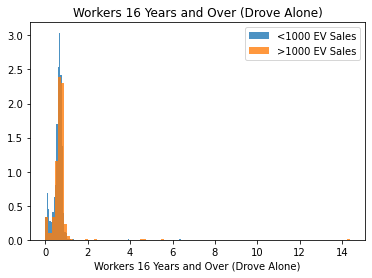

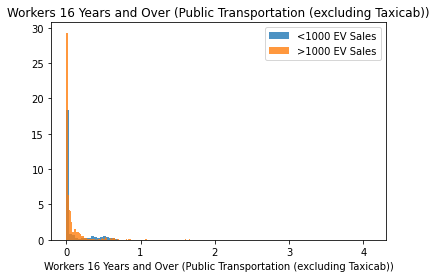

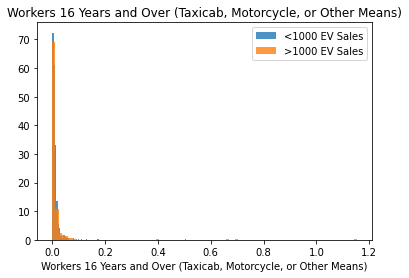

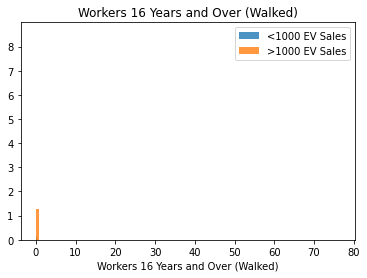

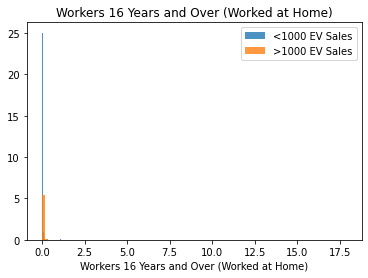

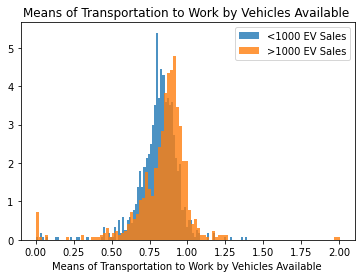

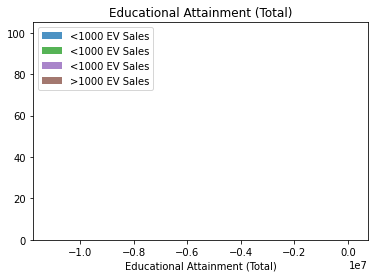

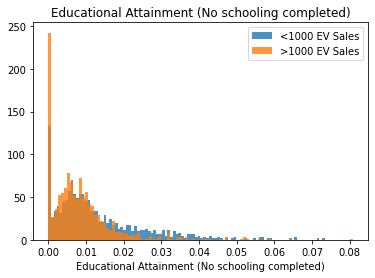

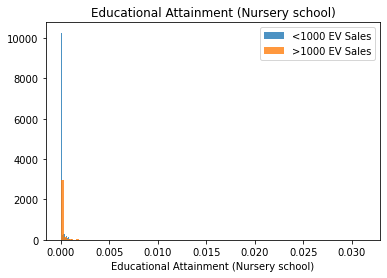

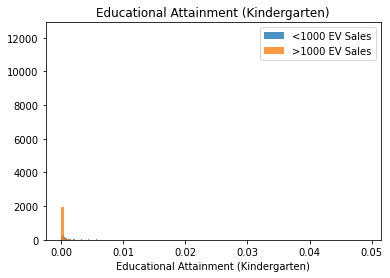

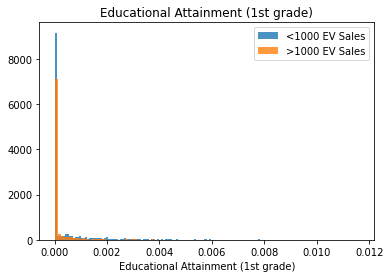

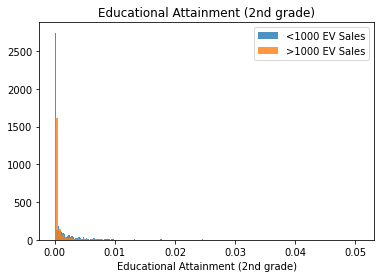

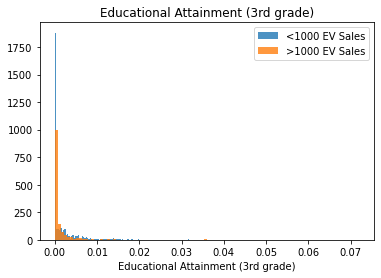

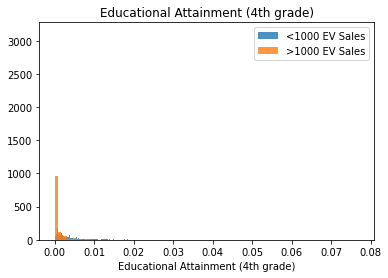

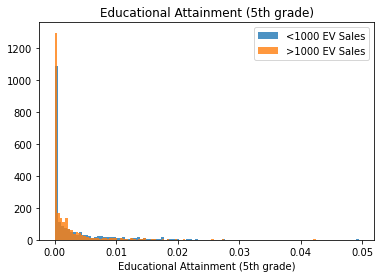

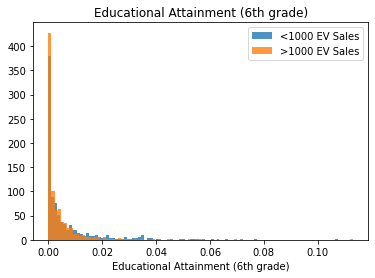

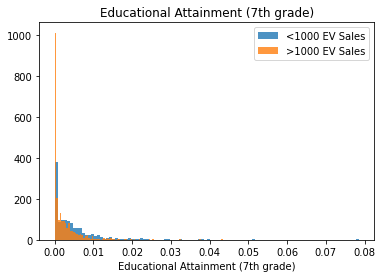

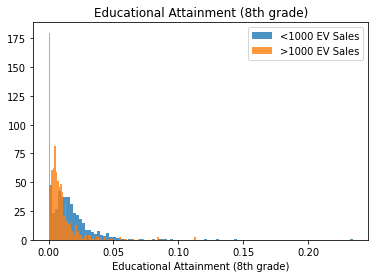

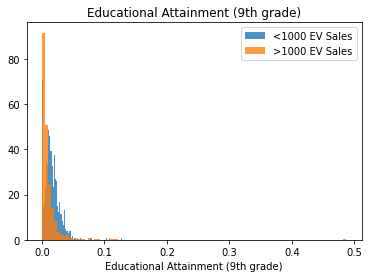

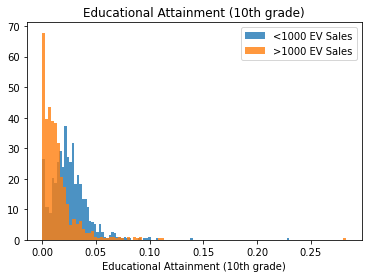

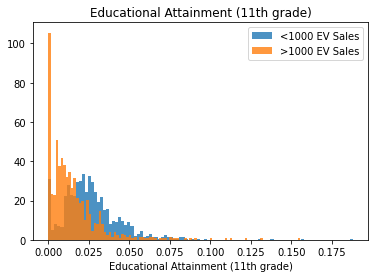

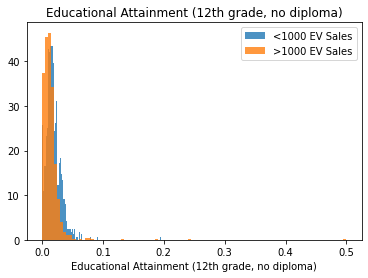

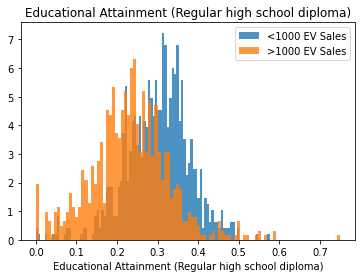

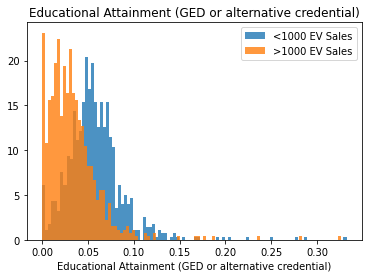

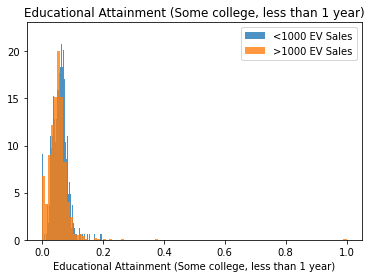

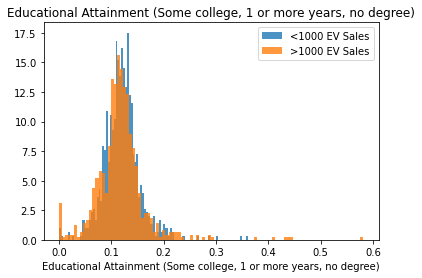

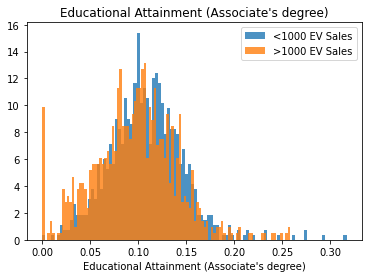

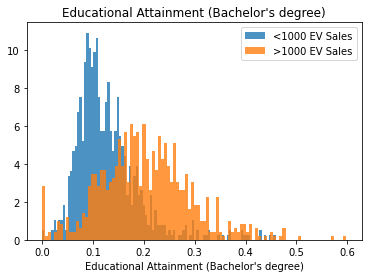

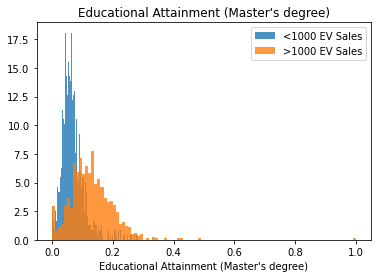

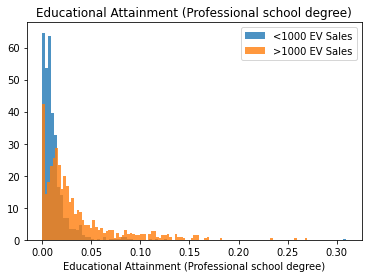

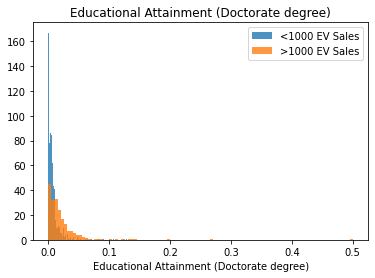

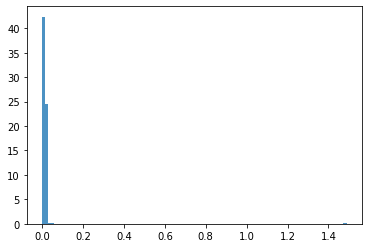

In [7]:
# ##EDUCATION

meandiff = (big.mean() - small.mean())/small.mean()*100

for i in meandiff.index:
    try:
        param = i
        plt.hist(small[param]/small["Educational Attainment (Total)"],bins=100,alpha=0.8,label="<1000 EV Sales",density=True)
        plt.hist(big[param]/big["Educational Attainment (Total)"],bins=100,alpha=0.8,label=">1000 EV Sales",density=True)
        plt.title(param)
        plt.xlabel(param)
        plt.legend()
        plt.show()
    except:
        pass

Small Zipcodes (<1000 Cars)

High School: 0.45193
College: 0.43504
Advanced Education: 0.11303


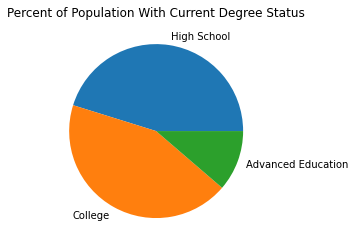

In [12]:
smalleducation = small.iloc[:,44:-1]
total = smalleducation["Educational Attainment (Total)"]
atmosthighschool = smalleducation.iloc[:,1:18].sum(axis=1)
college = smalleducation.iloc[:,18:22].sum(axis=1)
advanced = smalleducation.iloc[:,22:].sum(axis=1)
percents = pd.DataFrame([atmosthighschool,college,advanced])/total
labels = ["High School","College", "Advanced Education"]
print("Small Zipcodes (<1000 Cars)")
print('')
for i in range(3):
    print(labels[i] + ": "+ str(round(percents.mean(axis=1)[i],5)))
plt.pie(percents.mean(axis=1),labels = labels)

plt.title("Percent of Population With Current Degree Status")
plt.show()

newsmall = percents.T
newsmall.columns = labels

edusmall =newsmall

Big Zipcodes (<1000 Cars)

High School: 0.29546
College: 0.47494
Advanced Education: 0.2296


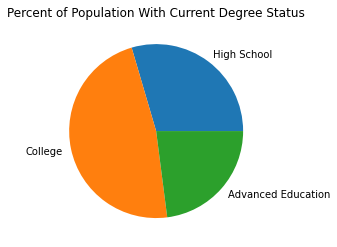

In [13]:
smalleducation = big.iloc[:,44:-1]
total = smalleducation["Educational Attainment (Total)"]
atmosthighschool = smalleducation.iloc[:,1:18].sum(axis=1)
college = smalleducation.iloc[:,18:22].sum(axis=1)
advanced = smalleducation.iloc[:,22:].sum(axis=1)
percents = pd.DataFrame([atmosthighschool,college,advanced])/total
labels = ["High School","College", "Advanced Education"]
print("Big Zipcodes (<1000 Cars)")
print('')
for i in range(3):
    print(labels[i] + ": "+ str(round(percents.mean(axis=1)[i],5)))
plt.pie(percents.mean(axis=1),labels = labels)

plt.title("Percent of Population With Current Degree Status")
plt.show()

newbig = percents.T
newbig.columns = labels

edubig = newbig

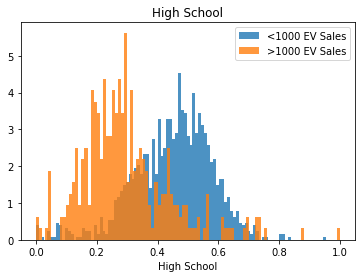

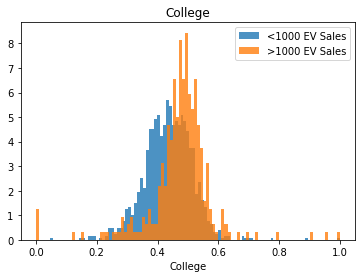

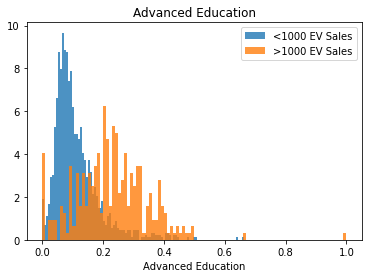

In [181]:
for i in labels:
    plt.hist(newsmall[i],bins=100,alpha=0.8,label="<1000 EV Sales",density=True)
    plt.hist(newbig[i],bins=100,alpha=0.8,label=">1000 EV Sales",density=True)
    plt.title(i)
    plt.xlabel(i)
    plt.legend()
    plt.show()

Small Zipcodes (<1000 Cars)

Households (1 Vehicle Available): 0.32846
Households (2 Vehicles Available): 0.36397
Households (3 Vehicles Available): 0.12684
Households (4 or More Vehicles Available): 0.05275
Households (No Vehicle Available): 0.12798


<ipython-input-14-fe2d6748fbfa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percents[i] = percents[i]/total


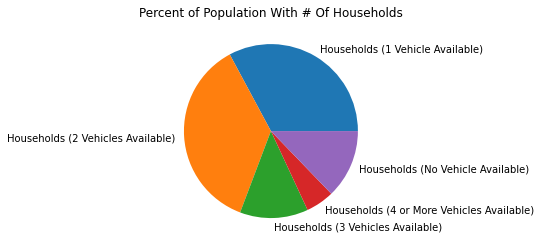

In [14]:
smalleducation = small.iloc[:,1:7]
total = smalleducation["Households"]
labels = smalleducation.columns
print("Small Zipcodes (<1000 Cars)")
print('')
percents = smalleducation.iloc[:,1:]
for i in percents.columns:
    percents[i] = percents[i]/total
    
for i in range(len(percents.columns)):
    print(percents.columns[i] + ": "+ str(round(percents.mean(axis=0)[i],5)))
    
labels = percents.columns
plt.pie(percents.mean(axis=0),labels = labels)

plt.title("Percent of Population With # Of Households")
plt.show()

newsmall = percents
newsmall.columns = labels

housesmall = newsmall

In [52]:
small.columns

Index(['Household Income in Past 12 Months', 'Households',
       'Households (1 Vehicle Available)', 'Households (2 Vehicles Available)',
       'Households (3 Vehicles Available)',
       'Households (4 or More Vehicles Available)',
       'Households (No Vehicle Available)', 'Housing Units',
       'Housing Units (1, Attached)', 'Housing Units (1, Detached)',
       'Housing Units (10 to 19)', 'Housing Units (2)',
       'Housing Units (20 to 49)', 'Housing Units (3 or 4)',
       'Housing Units (5 to 9)', 'Housing Units (50 or More)',
       'Housing Units (Boat, RV, Van, etc.)', 'Housing Units (Mobile Home)',
       'Median Household Income in Past 12 Months', 'Occupied Housing Units',
       'Occupied Housing Units (Owner Occupied)',
       'Occupied Housing Units (Renter Occupied)', 'Population',
       'Travel Time to Work (10 to 14 minutes)',
       'Travel Time to Work (15 to 19 minutes)',
       'Travel Time to Work (20 to 24 minutes)',
       'Travel Time to Work (25 to 29 

Big Zipcodes (<1000 Cars)

Households (1 Vehicle Available): 0.2994
Households (2 Vehicles Available): 0.41526
Households (3 Vehicles Available): 0.15476
Households (4 or More Vehicles Available): 0.06009
Households (No Vehicle Available): 0.0705


<ipython-input-15-bda48f172c72>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percents[i] = percents[i]/total


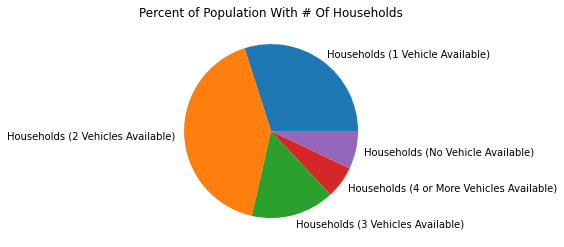

In [15]:
smalleducation = big.iloc[:,1:7]
total = smalleducation["Households"]
labels = smalleducation.columns
print("Big Zipcodes (<1000 Cars)")
print('')
percents = smalleducation.iloc[:,1:]
for i in percents.columns:
    percents[i] = percents[i]/total
    
for i in range(len(percents.columns)):
    print(percents.columns[i] + ": "+ str(round(percents.mean(axis=0)[i],5)))
    
labels = percents.columns
plt.pie(percents.mean(axis=0),labels = labels)

plt.title("Percent of Population With # Of Households")
plt.show()

newbig = percents
newbig.columns = labels

housebig = newbig

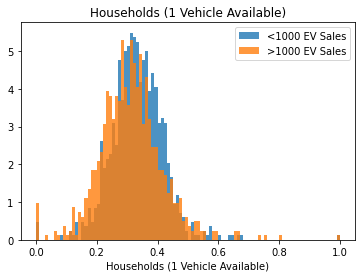

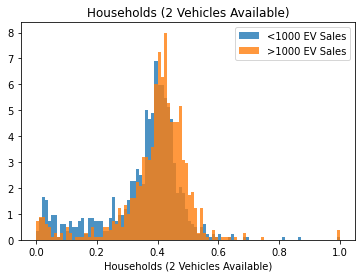

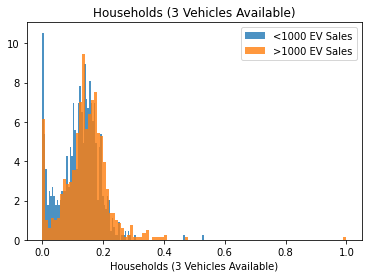

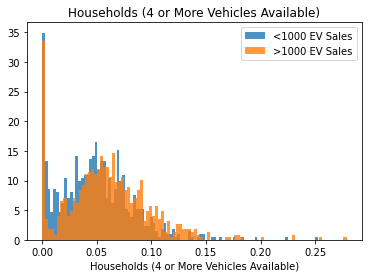

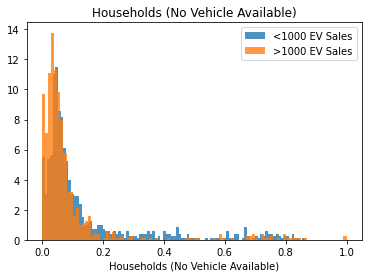

In [15]:
for i in labels:
    plt.hist(newsmall[i],bins=100,alpha=0.8,label="<1000 EV Sales",density=True)
    plt.hist(newbig[i],bins=100,alpha=0.8,label=">1000 EV Sales",density=True)
    plt.title(i)
    plt.xlabel(i)
    plt.legend()
    plt.show()

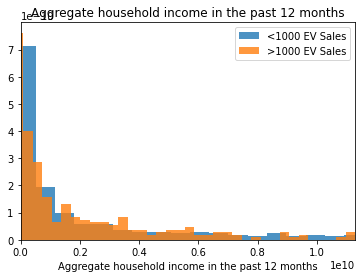

Small EV Sales: Household Income: 3161881614.30826
BIG EV Sales: Household Income: 1873053775.25


In [185]:
#INCOME
smallincome = small["Aggregate household income in the past 12 months"]
bigincome = big["Aggregate household income in the past 12 months"]
plt.hist(smallincome,bins=100,alpha=0.8,label="<1000 EV Sales",density=True)
plt.hist(bigincome,bins=100,alpha=0.8,label=">1000 EV Sales",density=True)
plt.title("Aggregate household income in the past 12 months")
plt.xlabel("Aggregate household income in the past 12 months")
plt.legend()
plt.xlim(xmin=0,xmax=np.quantile(bigincome,0.95))
plt.show()

print("Small EV Sales: Household Income" + ": "+ str(round(np.mean(smallincome),5)))
print("BIG EV Sales: Household Income" + ": "+ str(round(np.mean(bigincome),5)))

incomebig = smallincome
incomesmall = bigincome

Small Zipcodes (<1000 Cars)

0-19 minutes: 0.40216
20-45 minutes: 0.4041
45+ minutes: 0.19375


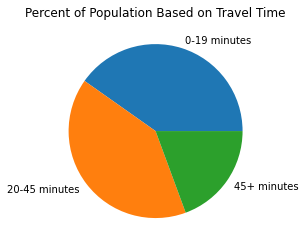

In [16]:
#TRAVEL TIME
smalleducation = small.iloc[:,23:33]
total = smalleducation["Travel Time to Work (Total Workers)"]
zeroto19 = smalleducation.iloc[:,[-2,0,1]].sum(axis=1)
twentyto45 = smalleducation.iloc[:,2:6].sum(axis=1)
fortyfiveplus = smalleducation.iloc[:,6:8].sum(axis=1)

percents = pd.DataFrame([zeroto19,twentyto45,fortyfiveplus])/total
labels = ["0-19 minutes","20-45 minutes","45+ minutes"]
print("Small Zipcodes (<1000 Cars)")
print('')
for i in range(3):
    print(labels[i] + ": "+ str(round(percents.mean(axis=1)[i],5)))
plt.pie(percents.mean(axis=1),labels = labels)

plt.title("Percent of Population Based on Travel Time")
plt.show()

newsmall = percents.T
newsmall.columns = labels

timesmall = newsmall

Big Zipcodes (>1000 Cars)

0-19 minutes: 0.40831
20-45 minutes: 0.38307
45+ minutes: 0.20862


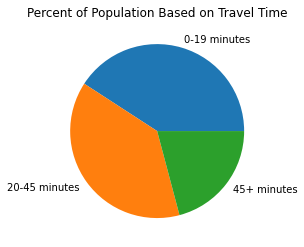

In [18]:
smalleducation = big.iloc[:,23:33]
total = smalleducation["Travel Time to Work (Total Workers)"]
zeroto19 = smalleducation.iloc[:,[-2,0,1]].sum(axis=1)
twentyto45 = smalleducation.iloc[:,2:6].sum(axis=1)
fortyfiveplus = smalleducation.iloc[:,6:8].sum(axis=1)

percents = pd.DataFrame([zeroto19,twentyto45,fortyfiveplus])/total
labels = ["0-19 minutes","20-45 minutes","45+ minutes"]
print("Big Zipcodes (>1000 Cars)")
print('')
for i in range(3):
    print(labels[i] + ": "+ str(round(percents.mean(axis=1)[i],5)))
plt.pie(percents.mean(axis=1),labels = labels)

plt.title("Percent of Population Based on Travel Time")
plt.show()

newbig = percents.T
newbig.columns = labels

timebig = newbig

Small Zipcodes (<1000 Cars)

Travel Time to Work (10 to 14 minutes): 0.12757
Travel Time to Work (15 to 19 minutes): 0.13583
Travel Time to Work (20 to 24 minutes): 0.13602
Travel Time to Work (25 to 29 minutes): 0.05565
Travel Time to Work (30 to 34 minutes): 0.12096
Travel Time to Work (35 to 44 minutes): 0.07044
Travel Time to Work (45 to 59 minutes): 0.07603
Travel Time to Work (60 or more minutes): 0.13259
Travel Time to Work (Less than 10 minutes): 0.14491


<ipython-input-19-03948dbb37ae>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percents[i] = percents[i]/total


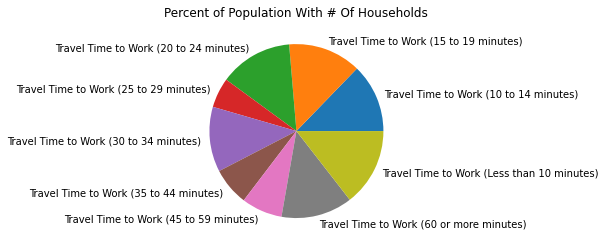

In [19]:
#
smalleducation = big.iloc[:,23:33]
total = smalleducation["Travel Time to Work (Total Workers)"]
labels = smalleducation.columns
print("Small Zipcodes (<1000 Cars)")
print('')
percents = smalleducation.iloc[:,:-1]
for i in percents.columns:
    percents[i] = percents[i]/total
    
for i in range(len(percents.columns)):
    print(percents.columns[i] + ": "+ str(round(percents.mean(axis=0)[i],5)))
    
labels = percents.columns
plt.pie(percents.mean(axis=0),labels = labels)

plt.title("Percent of Population With # Of Households")
plt.show()

newsmall = percents
newsmall.columns = labels

Small Zipcodes (<1000 Cars)

Workers 16 Years and Over (Bicycle): 0.00333
Workers 16 Years and Over (Carpooled): 0.08318
Workers 16 Years and Over (Drove Alone): 0.72284
Workers 16 Years and Over (Public Transportation (excluding Taxicab)): 0.08995
Workers 16 Years and Over (Taxicab, Motorcycle, or Other Means): 0.01131
Workers 16 Years and Over (Walked): 0.04549
Workers 16 Years and Over (Worked at Home): 0.04391


<ipython-input-20-e8f1476987cb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percents[i] = percents[i]/total


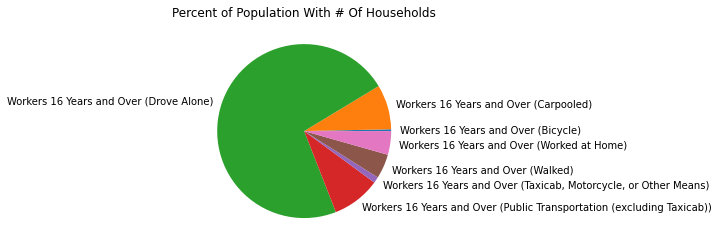

In [20]:
smalleducation = small.iloc[:,33:41]
total = smalleducation['Workers 16 Years and Over']
labels = smalleducation.columns
print("Small Zipcodes (<1000 Cars)")
print('')
percents = smalleducation.iloc[:,1:]
for i in percents.columns:
    percents[i] = percents[i]/total
    
for i in range(len(percents.columns)):
    print(percents.columns[i] + ": "+ str(round(percents.mean(axis=0)[i],5)))
    
labels = percents.columns
plt.pie(percents.mean(axis=0),labels = labels)

plt.title("Percent of Population With # Of Households")
plt.show()

newsmall = percents
newsmall.columns = labels

typesmall = newsmall

Big Zipcodes (>1000 Cars)

Workers 16 Years and Over (Bicycle): 0.00294
Workers 16 Years and Over (Carpooled): 0.0738
Workers 16 Years and Over (Drove Alone): 0.7172
Workers 16 Years and Over (Public Transportation (excluding Taxicab)): 0.08412
Workers 16 Years and Over (Taxicab, Motorcycle, or Other Means): 0.00942
Workers 16 Years and Over (Walked): 0.04277
Workers 16 Years and Over (Worked at Home): 0.06976


<ipython-input-21-b6aa11a2ddd7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percents[i] = percents[i]/total


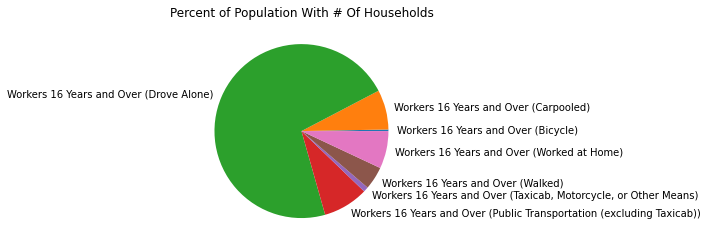

In [21]:
smalleducation = big.iloc[:,33:41]
total = smalleducation['Workers 16 Years and Over']
labels = smalleducation.columns
print("Big Zipcodes (>1000 Cars)")
print('')
percents = smalleducation.iloc[:,1:]
for i in percents.columns:
    percents[i] = percents[i]/total
    
for i in range(len(percents.columns)):
    print(percents.columns[i] + ": "+ str(round(percents.mean(axis=0)[i],5)))
    
labels = percents.columns
plt.pie(percents.mean(axis=0),labels = labels)

plt.title("Percent of Population With # Of Households")
plt.show()

newbig = percents
newbig.columns = labels

typebig = newbig

In [ ]:
#Decision Tree

In [59]:
smallfinal.columns[1:-2]

Index(['Median Household Income in Past 12 Months', 'Population',
       'Workers 16 Years and Over', 'High School', 'College',
       'Advanced Education', 'Households (1 Vehicle Available)',
       'Households (2 Vehicles Available)',
       'Households (3 Vehicles Available)',
       'Households (4 or More Vehicles Available)',
       'Households (No Vehicle Available)', '0-19 minutes', '20-45 minutes',
       '45+ minutes', 'Workers 16 Years and Over (Bicycle)',
       'Workers 16 Years and Over (Carpooled)',
       'Workers 16 Years and Over (Drove Alone)',
       'Workers 16 Years and Over (Public Transportation (excluding Taxicab))',
       'Workers 16 Years and Over (Taxicab, Motorcycle, or Other Means)',
       'Workers 16 Years and Over (Walked)',
       'Workers 16 Years and Over (Worked at Home)'],
      dtype='object')

In [22]:
smallbasic = np.log(small[["Median Household Income in Past 12 Months","Population","Workers 16 Years and Over"]])
smallbasic = pd.concat([pd.DataFrame(small["DMV ID"]),smallbasic],axis=1)
smallpercs = pd.concat([edusmall,housesmall,timesmall,typesmall],axis=1)
smallfinal = pd.concat([smallbasic,smallpercs],axis=1)

bigbasic = np.log(big[["Median Household Income in Past 12 Months","Population","Workers 16 Years and Over"]])
bigbasic = pd.concat([pd.DataFrame(big["DMV ID"]),bigbasic],axis=1)
bigpercs = pd.concat([edubig,housebig,timebig,typebig],axis=1)
bigfinal = pd.concat([bigbasic,bigpercs],axis=1)

allfinal = pd.concat([smallfinal,bigfinal])
allfinal = allfinal.dropna()

/Users/jasonmaytin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:352: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/Users/jasonmaytin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:352: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/jasonmaytin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:352: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/Users/jasonmaytin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:352: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [88]:
#bigfinal

In [25]:
np.exp(allfinal["Median Household Income in Past 12 Months"])

ZIP Code
10001     745605.0
10002     308466.0
10003     904107.0
10005    1256682.0
10009     541097.0
           ...    
14850     444255.0
14874     373406.0
14881     537460.0
14882     656617.0
14886     577753.0
Name: Median Household Income in Past 12 Months, Length: 1530, dtype: float64

In [ ]:
#print(model.coef_)

#_new = x[1000:]
# y_new = model.predict(x_new)
#print(y_new) 

In [26]:
y = allfinal["DMV ID"]/np.exp(allfinal["Population"]) #predicting electric vehicles/person
x = allfinal.iloc[:,1:]

import random
thirty = round(len(allfinal)*0.7)
boole = random.sample(list(x.index),thirty)
train_x = x.loc[boole]
train_y = y.loc[boole]
test_x = x.loc[~x.index.isin(boole)]
test_y = y.loc[~x.index.isin(boole)]

In [27]:
from scipy import stats
from sklearn.metrics import r2_score


model = LinearRegression()
model.fit(train_x, train_y)

n_features = train_x.shape[1]
t_values = model.coef_ / (np.std(train_y) / np.sqrt(np.sum((train_x - np.mean(train_x, axis=0)) ** 2, axis=0)))
p_values = stats.t.sf(np.abs(t_values), train_y.shape[0] - 1) * 2

features = pd.concat([pd.Series(train_x.columns),pd.Series(model.coef_),round(pd.Series(p_values),3)],axis=1)
features.columns = ["Feature","Coefficient","P-Value"]
features = features.set_index("Feature")

y_pred = model.predict(train_x)
r2 = r2_score(train_y, y_pred)
print("Train r^2: " + str(r2))

y_pred = model.predict(test_x)
r2 = r2_score(test_y, y_pred)
print("Test r^2: " + str(r2))

Train r^2: 0.3281207266201257
Test r^2: 0.28098774857676223


In [28]:
from scipy import stats
from sklearn.metrics import r2_score

newfeats = list(features[features["P-Value"]<0.05].index)

thirty = round(len(allfinal)*0.7)
boole = random.sample(list(x.index),thirty)
train_x = x.loc[boole][newfeats]
train_y = y.loc[boole]
test_x = x.loc[~x.index.isin(boole)][newfeats]
test_y = y.loc[~x.index.isin(boole)]

model = LinearRegression()
model.fit(train_x, train_y)

n_features = train_x.shape[1]
t_values = model.coef_ / (np.std(train_y) / np.sqrt(np.sum((train_x - np.mean(train_x, axis=0)) ** 2, axis=0)))
p_values = stats.t.sf(np.abs(t_values), train_y.shape[0] - 1) * 2

features = pd.concat([pd.Series(train_x.columns),pd.Series(model.coef_),round(pd.Series(p_values),3)],axis=1)
features.columns = ["Feature","Coefficient","P-Value"]
features = features.set_index("Feature")

y_pred = model.predict(train_x)
r2 = r2_score(train_y, y_pred)
print("Train r^2: " + str(r2))

y_pred = model.predict(test_x)
r2 = r2_score(test_y, y_pred)
print("Test r^2: " + str(r2))

Train r^2: 0.27987058149769517
Test r^2: 0.4232882038009531


Regression Tree: Predicting The # of Electric Vehicles/Person in a New York County


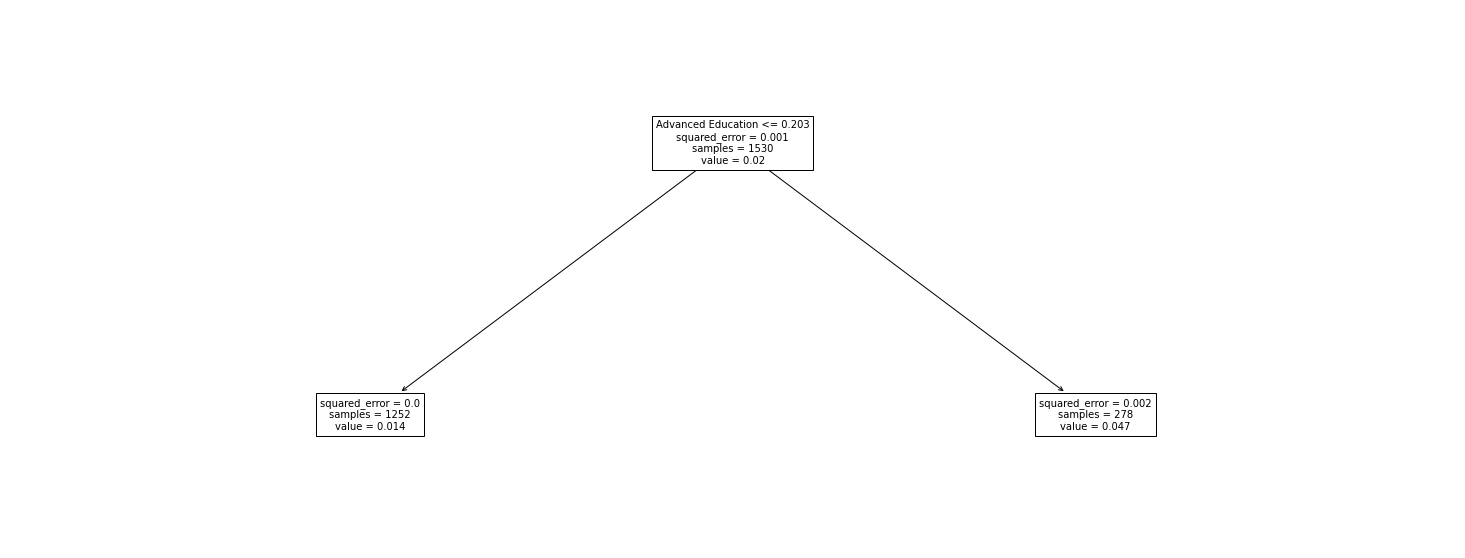

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

x_d = x#.iloc[:,3:]

decisiontree = tree.DecisionTreeRegressor(max_depth=1,min_samples_leaf=20,min_samples_split=50)
decisiontree.fit(x_d,y)

print("Regression Tree: Predicting The # of Electric Vehicles/Person in a New York County")

feature_names = x_d.columns
fig, ax = plt.subplots(figsize=(26, 10))
tree.plot_tree(decisiontree,feature_names=feature_names, max_depth=4, fontsize=10)
plt.show()

Random Forest Model: Relative Importance of Features for Predicting # Of Cars/Person


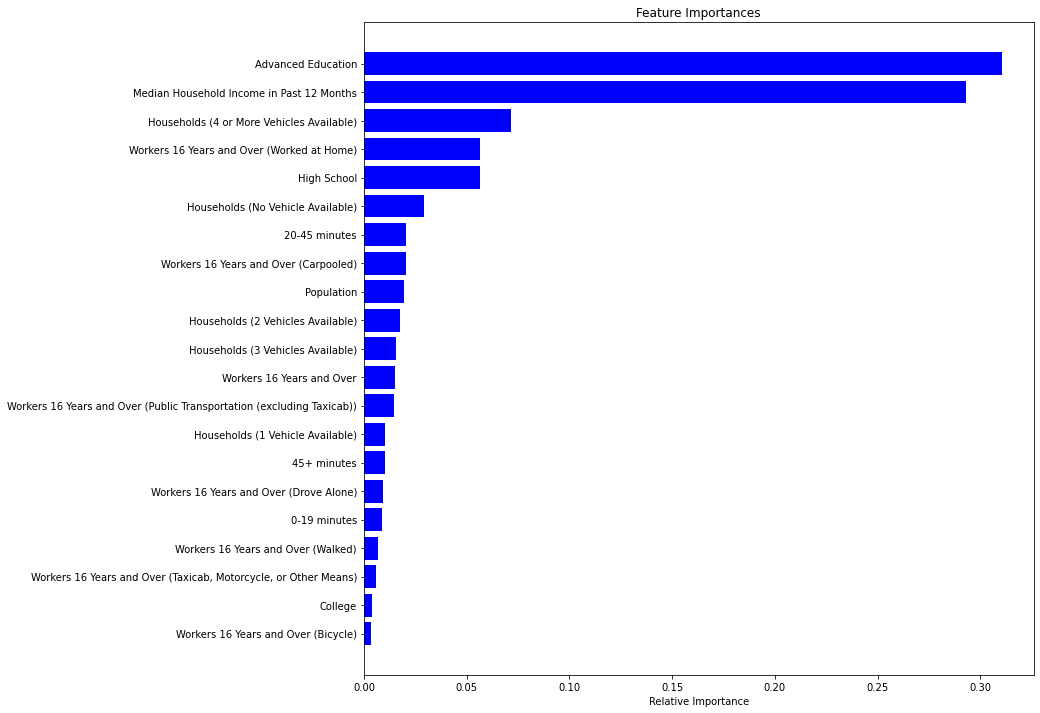

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(max_depth=5) #max_depth = 5
rf_model.fit(x_d,y)

print("Random Forest Model: Relative Importance of Features for Predicting # Of Cars/Person")

import matplotlib.pyplot as plt
%matplotlib inline
labels = x_d.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices],  color='b', align='center')
plt.yticks(range(len(indices)),labels[indices])

plt.xlabel('Relative Importance')
plt.show()
#.feature_importances attribute in model
#relative importance

In [13]:

#IDEA

#split into big/small EV/population group
#predict on the first few significant variables for logistic regression
#based on probabilities, assign them to each group
#look for values that are substantially different, and allocate more resources towards EV marketing (untapped markets)

In [32]:
from sklearn.linear_model import LogisticRegression

In [139]:
#logall[["Median Household Income in Past 12 Months","Advanced Education"]]

In [144]:
#logall

In [ ]:
zip_data=pd.read_csv('zip_data.csv')
zip_data=zip_data.set_index('zip')

In [33]:
logsmall = smallfinal
logsmall["EV/Person"] = logsmall["DMV ID"]/np.exp(logsmall["Population"])
logsmall["Logistic"] = 0
logbig = bigfinal
logbig["EV/Person"] = logbig["DMV ID"]/np.exp(logbig["Population"])
logbig["Logistic"] = 1

logall = pd.concat([logsmall,logbig],axis=0).dropna()

thirty = round(len(logall)*0.7)
boole = random.sample(list(logall.index),thirty)
train_x = logall.loc[boole][["Median Household Income in Past 12 Months","Advanced Education"]]#.iloc[:,:-2]
train_y = logall.loc[boole]["Logistic"]
test_x = logall.loc[~logall.index.isin(boole)][["Median Household Income in Past 12 Months","Advanced Education"]]#.iloc[:,:-2]
test_y = logall.loc[~logall.index.isin(boole)]["Logistic"]



logreg = LogisticRegression(random_state=16)
logreg.fit(train_x, train_y)

LogisticRegression(random_state=16)

In [34]:
from sklearn import metrics
y_pred = logreg.predict(train_x)
cnf_matrix = metrics.confusion_matrix(train_y, y_pred)
cnf_matrix

#Training Data Confusion Matrix

array([[865,  25],
       [131,  50]])

In [35]:
y_pred = logreg.predict(test_x)
cnf_matrix = metrics.confusion_matrix(test_y, y_pred)
cnf_matrix

#Testing Data Confusion Matrix

array([[368,  10],
       [ 56,  25]])

<AxesSubplot:xlabel='Advanced Education', ylabel='Logistic'>

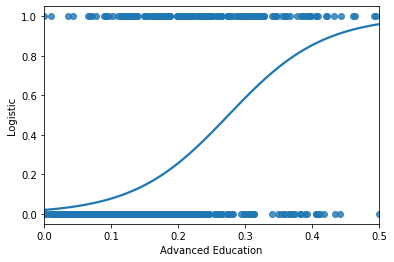

In [36]:
import seaborn as sns

sns.regplot(x=train_x["Advanced Education"], y=train_y, logistic=True, ci=None)

In [37]:
testing = logsmall.dropna()
x = testing[["Median Household Income in Past 12 Months","Advanced Education"]]
y = testing["Logistic"]

In [38]:
y_pred = logreg.predict(x)
predicts = x[y_pred==1]

In [39]:
EVperP = logbig[logbig["EV/Person"]<1]
EVperP["Population"] = round(np.exp(EVperP["Population"])/10)
mean_EVperP = np.mean(EVperP["EV/Person"])
actual_EVperP = predicts.join(logsmall[["EV/Person","Population"]])
actual_EVperP["Population"] = round(np.exp(actual_EVperP["Population"])/10)

diff = mean_EVperP - actual_EVperP["EV/Person"]

moreCars = diff*actual_EVperP["Population"]
#excluding NYC/Brooklyn Counties

moreCars.loc[10501:10996]

<ipython-input-39-e1cf05b13b43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EVperP["Population"] = round(np.exp(EVperP["Population"])/10)


ZIP Code
10501      43.498196
10527      39.152053
10594     171.480663
10607     230.528634
10914      15.497029
10930     389.562959
10956    1049.712057
10996     394.090347
dtype: float64

In [49]:
basics["Median Household Income in Past 12 Months"] = np.exp(basics["Median Household Income in Past 12 Months"])/10
basics

/Users/jasonmaytin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-49-f7f2c4241b9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basics["Median Household Income in Past 12 Months"] = np.exp(basics["Median Household Income in Past 12 Months"])/10


,Median Household Income in Past 12 Months,Advanced Education,EV/Person,Population
ZIP Code,,,,
10501,inf,0.184513,0.028270,1100.0
10527,inf,0.434715,0.023823,890.0
10594,inf,0.196733,0.030600,4608.0
10607,inf,0.245761,0.030805,6229.0
10914,inf,0.243051,0.018927,317.0
10930,inf,0.220490,0.019726,8101.0
10956,inf,0.276693,0.030702,28285.0
10996,inf,0.406578,0.004045,6180.0


In [50]:
basics = actual_EVperP.loc[10501:10996]
basics["Median Household Income in Past 12 Months"] = np.exp(basics["Median Household Income in Past 12 Months"])/10
Existing = round(basics["EV/Person"]*basics["Population"])
Predicted = round(mean_EVperP*basics["Population"])
Difference = round(moreCars.loc[10501:10996])


final = pd.concat([basics,Existing,Predicted,Difference],axis=1)
final.columns = ['Median Household Income in Past 12 Months', 'Advanced Education','EV/Person',
                 'Population', "Existing EVs on Road",'Potential EVs on Road', "Difference"]
final = final[['EV/Person',
                 'Population', "Existing EVs on Road",'Potential EVs on Road', "Difference"]]
final["POTENTIAL REVENUE"] = final["Difference"]*9580
final
sum(final["POTENTIAL REVENUE"])

<ipython-input-50-a65b8350c318>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basics["Median Household Income in Past 12 Months"] = np.exp(basics["Median Household Income in Past 12 Months"])/10


22350140.0

In [51]:
basics

,Median Household Income in Past 12 Months,Advanced Education,EV/Person,Population
ZIP Code,,,,
10501,139289.1,0.184513,0.028270,1100.0
10527,158651.5,0.434715,0.023823,890.0
10594,116096.6,0.196733,0.030600,4608.0
10607,119859.0,0.245761,0.030805,6229.0
10914,121760.3,0.243051,0.018927,317.0
10930,114129.0,0.220490,0.019726,8101.0
10956,111531.5,0.276693,0.030702,28285.0
10996,91865.8,0.406578,0.004045,6180.0
